In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading the Data

In [2]:
PATH = '/content/drive/MyDrive/Data/customer_churn_large_dataset.xlsx'
dataset = pd.read_excel(PATH)

In [3]:
data = dataset.drop(['Name'], axis = 1)
data.columns = [col.lower() for col in data.columns]
data.head()

,customerid,age,gender,location,subscription_length_months,monthly_bill,total_usage_gb,churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customerid                  100000 non-null  int64  
 1   age                         100000 non-null  int64  
 2   gender                      100000 non-null  object 
 3   location                    100000 non-null  object 
 4   subscription_length_months  100000 non-null  int64  
 5   monthly_bill                100000 non-null  float64
 6   total_usage_gb              100000 non-null  int64  
 7   churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 6.1+ MB


Note: No Null Values

In [5]:
data.describe()

,customerid,age,subscription_length_months,monthly_bill,total_usage_gb,churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Note: No visible outliers here

<Axes: xlabel='age', ylabel='Count'>

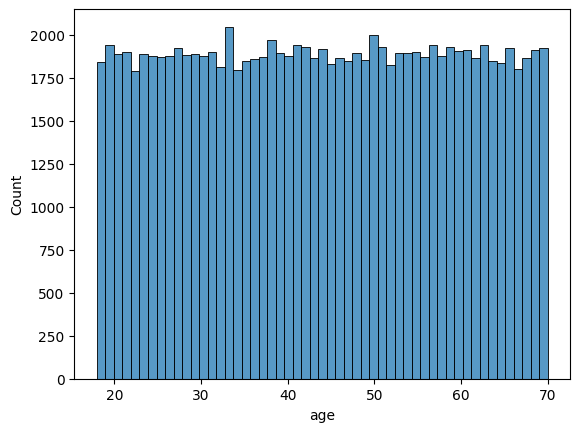

In [6]:
sns.histplot(data['age'], bins = 70 - 18 + 1)

Note: Clearly, all the age values are equally distributed throughout

<Axes: xlabel='location', ylabel='Count'>

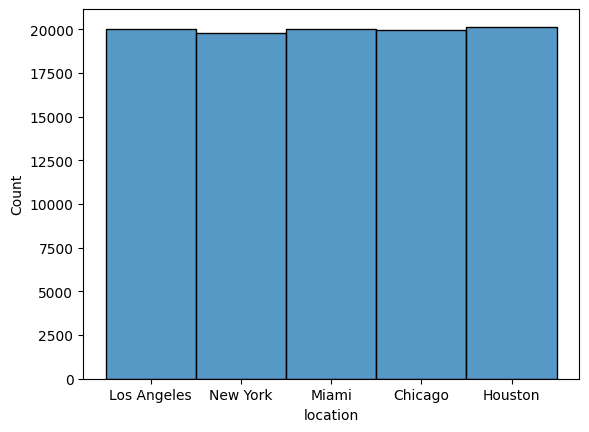

In [7]:
sns.histplot(data.location)

Note: Customers come evenly from all the different 5 places

<Axes: xlabel='subscription_length_months', ylabel='Count'>

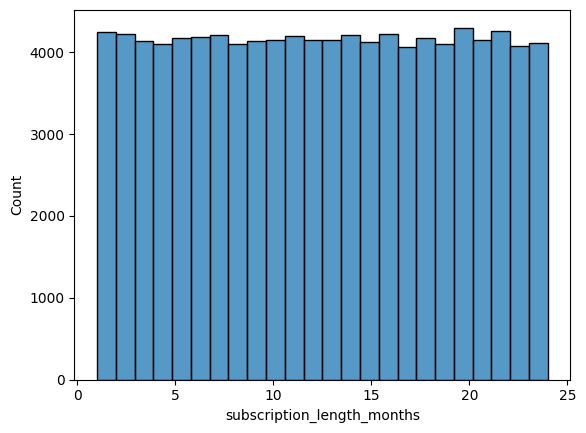

In [8]:
sns.histplot(data.subscription_length_months, bins = 24)

<Axes: xlabel='age', ylabel='subscription_length_months'>

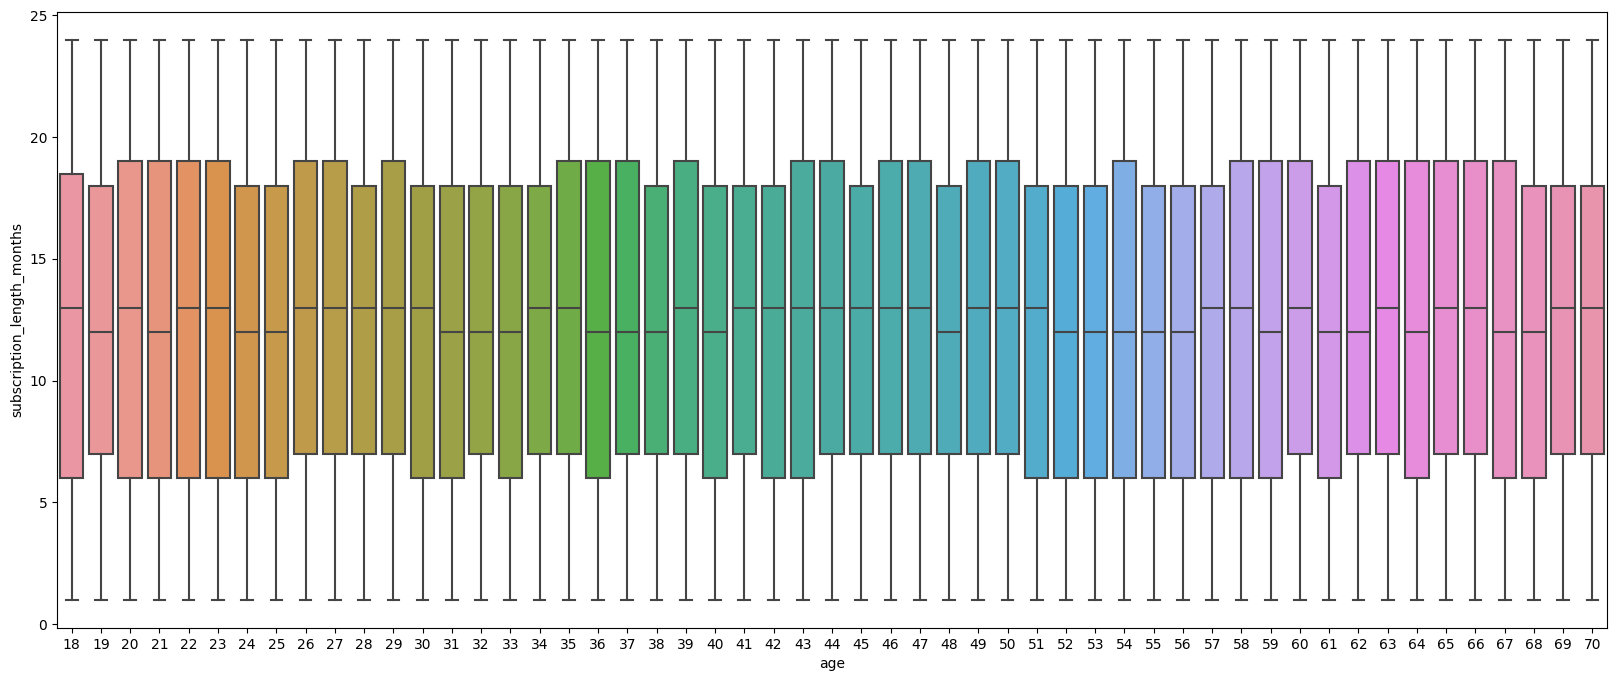

In [9]:
plt.figure(figsize=(20, 8))
sns.boxplot(data, x='age', y='subscription_length_months')

<Axes: xlabel='location', ylabel='subscription_length_months'>

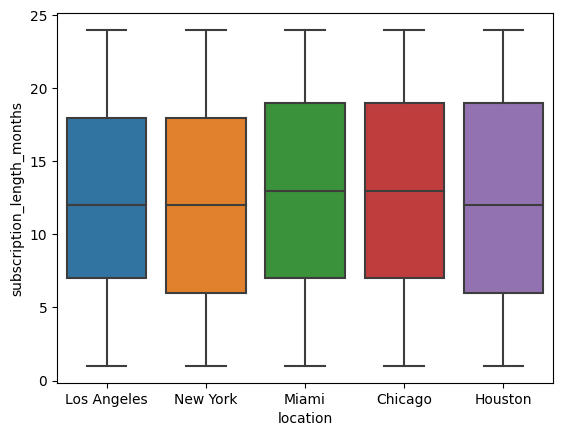

In [10]:
sns.boxplot(data, x='location', y='subscription_length_months')

Note: Looks pretty normal, no anomalies

<Axes: xlabel='monthly_bill', ylabel='Count'>

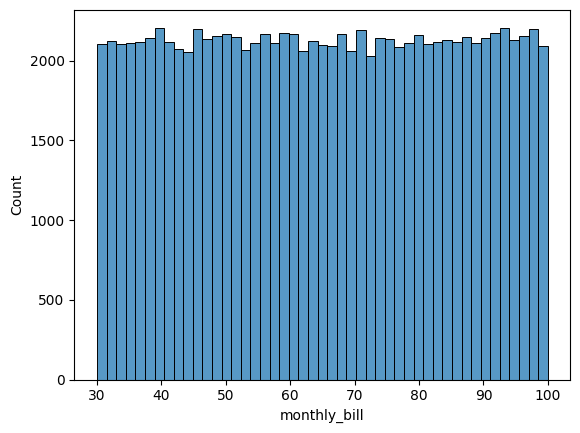

In [11]:
sns.histplot(data.monthly_bill)

<Axes: xlabel='age', ylabel='monthly_bill'>

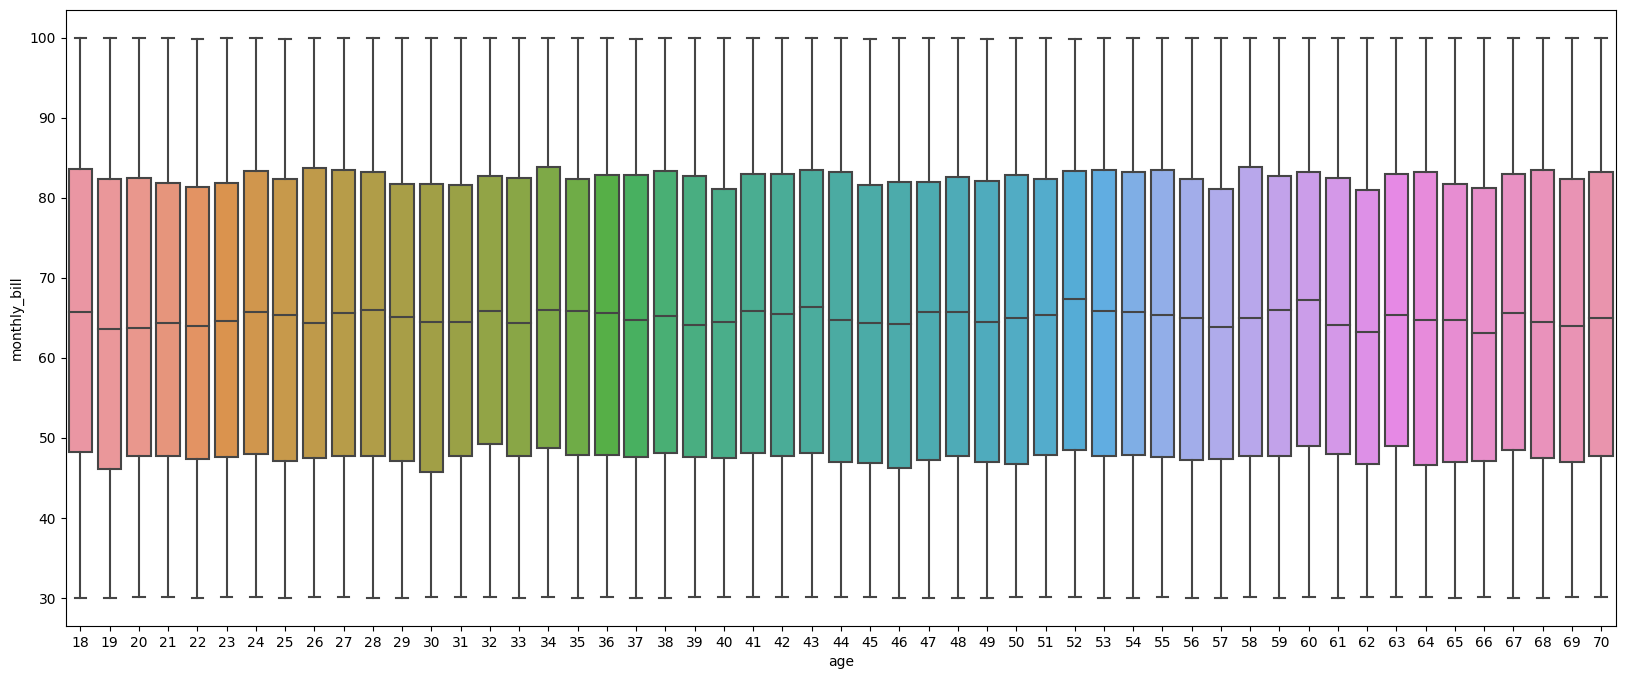

In [12]:
plt.figure(figsize=(20, 8))
sns.boxplot(data, x = 'age', y = 'monthly_bill')

<Axes: xlabel='location', ylabel='monthly_bill'>

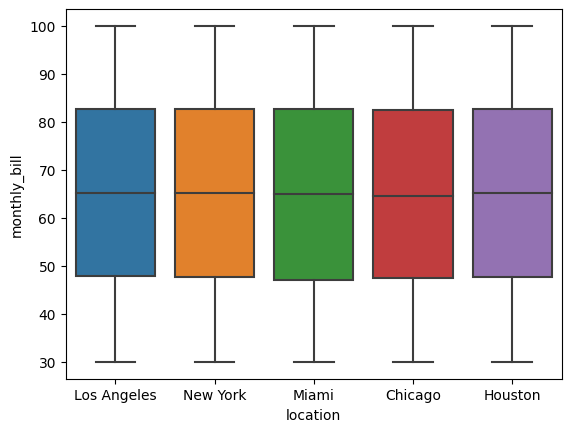

In [13]:
sns.boxplot(data, x = 'location', y = 'monthly_bill')

Note: Looks pretty clean, no anolmalies

<Axes: xlabel='total_usage_gb', ylabel='Count'>

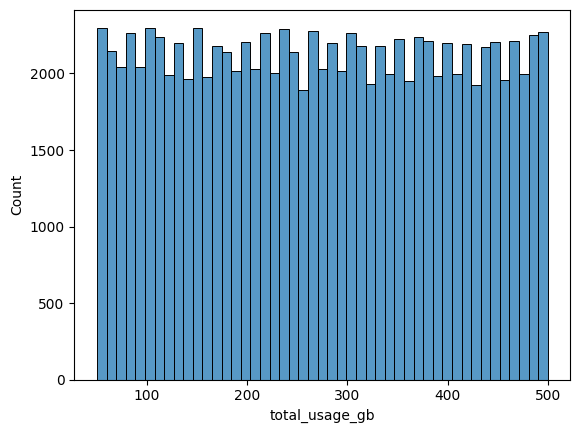

In [14]:
sns.histplot(data.total_usage_gb)

<Axes: xlabel='age', ylabel='total_usage_gb'>

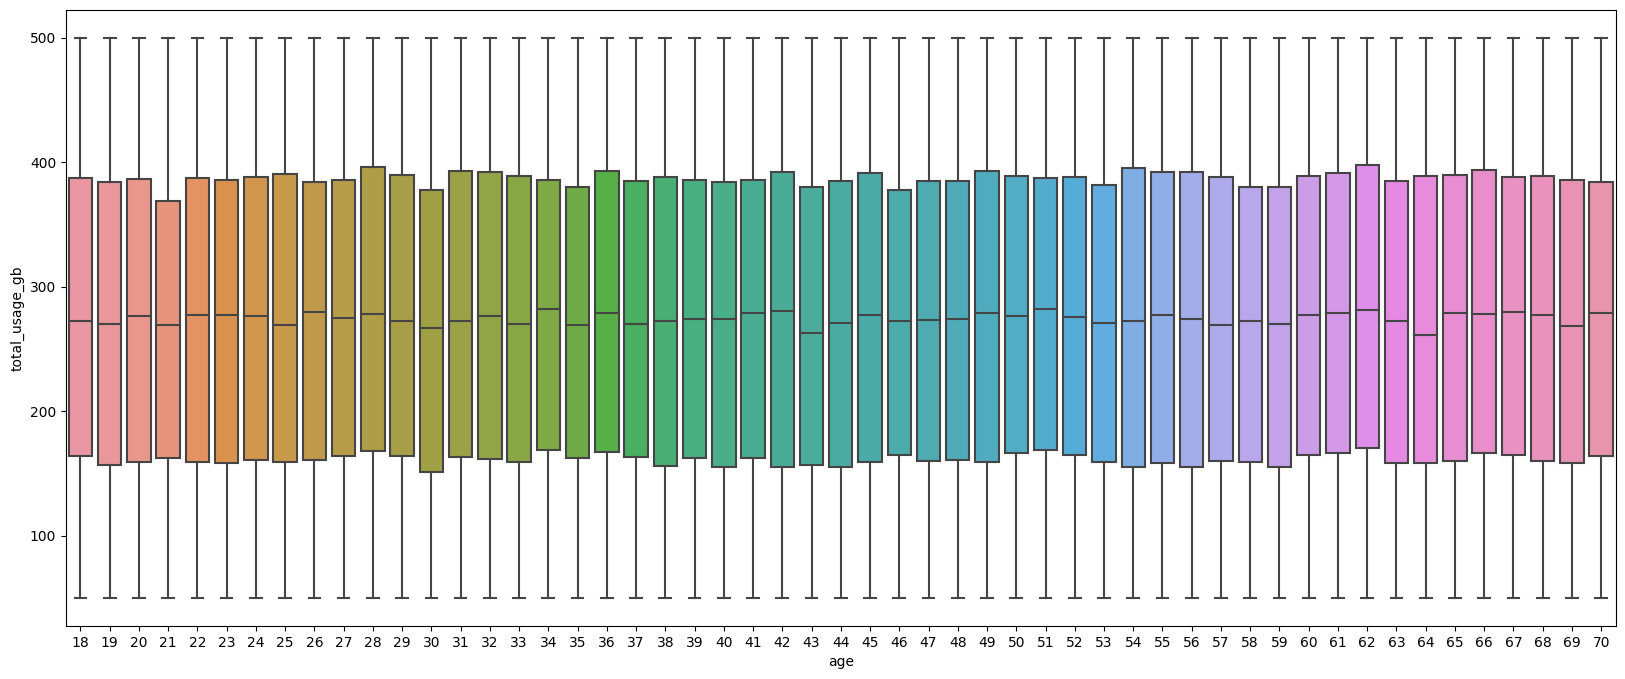

In [15]:
plt.figure(figsize = (20,8))
sns.boxplot(data, x = 'age', y = 'total_usage_gb')

<Axes: xlabel='location', ylabel='total_usage_gb'>

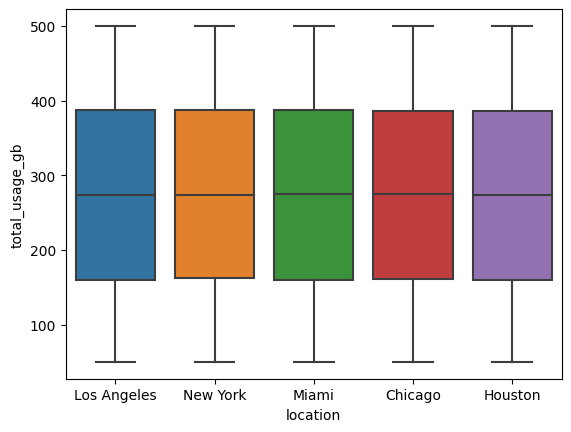

In [16]:
sns.boxplot(data, x = 'location', y = 'total_usage_gb')

Note: No anomalies here as well. Pretty evenly distributed.

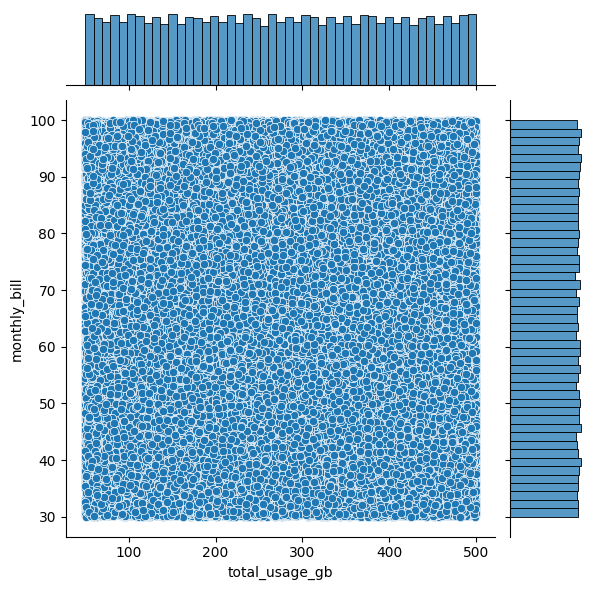

In [17]:
sns.jointplot(data, x = 'total_usage_gb', y = 'monthly_bill')

Note: No real relation between the 2 columns, pretty independent

<ipython-input-18-fbad6fe3e76d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop('customerid', axis = 1).corr(), cmap = 'rainbow', annot = True)


<Axes: >

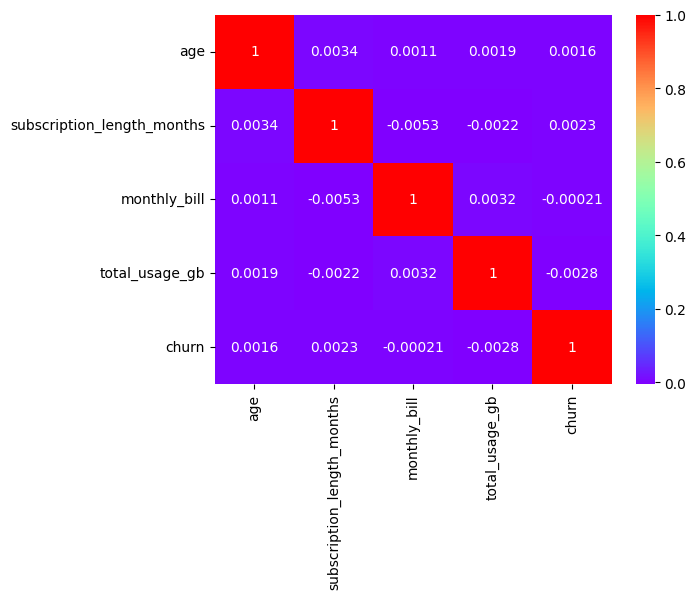

In [18]:
sns.heatmap(data.drop('customerid', axis = 1).corr(), cmap = 'rainbow', annot = True)

Note: Clearly states no realtion whatsoever. Churn follows no trend with any other column. It is almost like the churn values have been randomly assigned i.e. 2 extremely similar cases with all the values very close to each other can still have different churn predictions.

In [19]:
data['churn'].value_counts()

0    50221
1    49779
Name: churn, dtype: int64

In [20]:
for location in data.location.unique():
    print(f'{location}: ')
    print(data[data['location'] == location]['churn'].value_counts())
    print('---'*30)

Los Angeles: 
0    10161
1     9880
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
New York: 
1    9979
0    9834
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
Miami: 
1    10076
0     9955
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
Chicago: 
0    10013
1     9945
Name: churn, dtype: int64
------------------------------------------------------------------------------------------
Houston: 
0    10258
1     9899
Name: churn, dtype: int64
------------------------------------------------------------------------------------------


<Axes: >

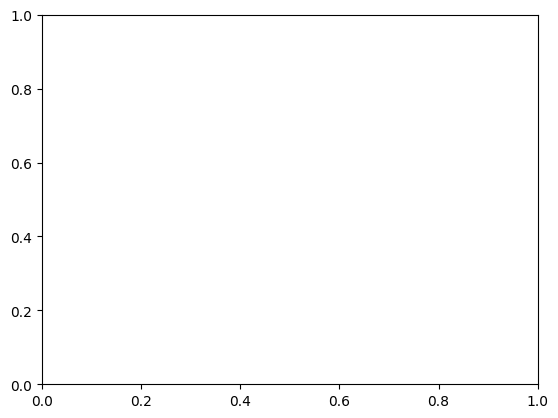

In [21]:
sns.scatterplot(data[(data['subscription_length_months'] == 1) & (data['location'] == 0)], x = 'total_usage_gb', y = 'monthly_bill')

This plot shows trend between **total_usage_gb** and **monthly_bill** when the subscription length is 1 month and the location is 0.
We can see that, for a total_usage_gb of less than 100 the monthly_bill can go as high as 100 and as low as 30. This is very inconsistent.

# Feature Engineering

In [22]:
full_df = data

In [23]:
gender_map = {'Male': 0, 'Female': 1}
location_map = {loc:i for i,loc in enumerate(sorted(full_df.location.unique()))}

In [24]:
location_map

{'Chicago': 0, 'Houston': 1, 'Los Angeles': 2, 'Miami': 3, 'New York': 4}

In [25]:
full_df['gender'] = full_df['gender'].map(gender_map)
full_df['location'] = full_df['location'].map(location_map)

In [26]:
full_df.head(20)

,customerid,age,gender,location,subscription_length_months,monthly_bill,total_usage_gb,churn
0,1,63,0,2,17,73.36,236,0
1,2,62,1,4,1,48.76,172,0
2,3,24,1,2,5,85.47,460,0
3,4,36,1,3,3,97.94,297,1
4,5,46,1,3,19,58.14,266,0
5,6,67,0,4,15,82.65,456,1
6,7,30,1,0,3,73.79,269,0
7,8,67,1,3,1,97.70,396,1
8,9,20,1,3,10,42.45,150,1
9,10,53,1,2,12,64.49,383,1


In [27]:
# full_df['monthly_usage_gb'] = full_df['total_usage_gb'] / full_df['subscription_length_months']
# full_df['total_bill'] = full_df['monthly_bill'] * full_df['subscription_length_months']
# full_df['gb_rate'] = full_df['total_usage_gb'] / full_df['total_bill']
# full_df['age_bins'] = full_df['age'].apply(lambda x: x // 10 - 2 if x >= 20 and x < 70 else 2 if x < 20 else 4)

Tried creating new feautres, no improvement

In [28]:
# from sklearn.preprocessing import MinMaxScaler

# data['monthly_bill'] = MinMaxScaler().fit_transform(data['monthly_bill'].values.reshape(-1, 1))
# data['total_usage_gb'] = MinMaxScaler().fit_transform(data['total_usage_gb'].values.reshape(-1, 1))

Tried Feature Scaling, no improvement

In [29]:
full_df

,customerid,age,gender,location,subscription_length_months,monthly_bill,total_usage_gb,churn
0,1,63,0,2,17,73.36,236,0
1,2,62,1,4,1,48.76,172,0
2,3,24,1,2,5,85.47,460,0
3,4,36,1,3,3,97.94,297,1
4,5,46,1,3,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,0,1,23,55.13,226,1
99996,99997,62,1,4,19,61.65,351,0
99997,99998,64,0,0,17,96.11,251,1
99998,99999,51,1,4,20,49.25,434,1


In [30]:
full_df.corr()

,customerid,age,gender,location,subscription_length_months,monthly_bill,total_usage_gb,churn
customerid,1.000000,-0.001085,0.000131,0.000062,0.005444,0.001265,-0.004025,-0.004586
age,-0.001085,1.000000,-0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
gender,0.000131,-0.000832,1.000000,0.003314,-0.000320,-0.002239,0.001385,-0.002121
location,0.000062,-0.005889,0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
subscription_length_months,0.005444,0.003382,-0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
monthly_bill,0.001265,0.001110,-0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
total_usage_gb,-0.004025,0.001927,0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
churn,-0.004586,0.001559,-0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


# Imports and Data Preparation


In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [38]:
!pip install catboost
from catboost import CatBoostClassifier

In [39]:
train_df, test_df = train_test_split(full_df, test_size = 0.1, random_state = 101)

In [40]:
# X, y = full_df.drop(['customerid', 'churn'], axis = 1), full_df.churn
X, y = train_df.drop(['customerid', 'churn'], axis = 1), train_df.churn
categorical_features = ['location', 'gender']

# CatBoost

In [35]:
fold = 5
skfold = StratifiedKFold(n_splits = fold, shuffle = True, random_state = 101)

final_models = []
final_scores = []

for location in location_map.keys():
    print(f"----------------LOCATION: {location.upper()}----------------")
    local_df = full_df[full_df['location'] == location_map[location]]
    X, y = local_df.drop(['customerid', 'churn', 'location'], axis = 1), local_df.churn

    skfold.get_n_splits(X, y)

    scores_cat = []
    models = []

    for i, (train_idx, val_idx) in enumerate(skfold.split(X, y)):
        print(f"Iteration {i + 1}: ")

        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        dropped_columns = []

        model_cat = CatBoostClassifier(iterations=3000, od_type='Iter', eval_metric='Accuracy', learning_rate = 0.0001)
        model_cat.fit(X_train.drop(dropped_columns, axis = 1), y_train,
                      eval_set = (X_val.drop(dropped_columns, axis = 1), y_val),
                      cat_features = ['gender'],
                      early_stopping_rounds = 300,
                      verbose = 200)

        labels_cat = model_cat.predict(X_val.drop(dropped_columns, axis = 1))
        score_cat = accuracy_score(y_val.values, labels_cat)
        scores_cat.append(score_cat)

        models.append(model_cat)

        print(f"Accuracy Score: {score_cat}")
        print("---"*30)

    final_models.append(models[np.argmax(scores_cat)])
    final_scores.append(np.mean(scores_cat))
    print("---"*30)

----------------LOCATION: CHICAGO----------------
Iteration 1: 
0:	learn: 0.5186020	test: 0.4979960	best: 0.4979960 (0)	total: 62.3ms	remaining: 3m 6s
200:	learn: 0.5542403	test: 0.4939880	best: 0.5090180 (4)	total: 2.81s	remaining: 39.2s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.5090180361
bestIteration = 4

Shrink model to first 5 iterations.
Accuracy Score: 0.5090180360721442
------------------------------------------------------------------------------------------
Iteration 2: 
0:	learn: 0.5117750	test: 0.5075150	best: 0.5075150 (0)	total: 6.89ms	remaining: 20.7s
200:	learn: 0.5635100	test: 0.4929860	best: 0.5075150 (0)	total: 1.09s	remaining: 15.2s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.5075150301
bestIteration = 0

Shrink model to first 1 iterations.
Accuracy Score: 0.5075150300601202
------------------------------------------------------------------------------------------
Iteration 3: 
0:	learn: 0.5234874	test: 0.4929860	

In [36]:
print(final_scores)

[0.5095202934056536, 0.5088557971356904, 0.5135970637920966, 0.5075633243421616, 0.5144104674447625]


In [41]:
import pickle
for loc, mod in zip(location_map.keys(), final_models):
    filename = f'{loc}_model.pkl'
    pickle.dump(mod, open(filename, 'wb'))

In [ ]:
# pd.DataFrame({'column': X.columns, 'imp' : best_model.feature_importances_}).sort_values(by = 'imp', ascending = False)

These feature importance values are of no significance because this table shows how important a feature is in achieving 50% accuracy for the model.

### Conclusion:
The data is extremely random. There is no realistic relation between any of the columns and the churn values seem randomly assigned to each row. On top of that, the data is too clean and there is no scope for further modification in the values. Even after generating new features, because of the randomness of the already present data, the new features are also very insignicant towards the performance of the model.

The model accuracy stays just around 50% accuracy and no method is working to improve it.